# Markov-Chain - MCMC Supermarket Simulation

In [54]:
# Import all required packages
import pandas as pd
import numpy as np
import datetime 
import glob
from datetime import datetime as date
import matplotlib.pyplot as plt

In [55]:
# Read in all csv-files
all_files = glob.glob("data\*.CSV")

df_list = []
for f in all_files:
    cur_df = pd.read_csv(f, header=0, delimiter=";")
    cur_df.columns = cur_df.columns.str.strip()
    df_list.append(cur_df)
df = pd.concat(df_list)

In [56]:
# Define function to gerneate date variables
def datetime_gen(df, dt_list, var='datetime'):  
    for i in dt_list:
        df[i]=eval("pd.DatetimeIndex(df[var])." + i)
    if "weekday" in dt_list:
        days = { 0 : 'mon' ,1 : 'tue' ,2 : 'wed' ,3 : 'thu' ,4 : 'fri'}
        df["dayofweek"] = df['weekday'].apply(lambda x: days[x])
    df[var]=pd.DatetimeIndex(df[var])
    return df

In [57]:
# Apply function
dt_list = ['weekday', 'hour', 'minute'] # 'day', 'month', 'year',
df = datetime_gen(df, dt_list, var='timestamp')
df["cust_id"] = df["dayofweek"] + df["customer_no"].astype(str)

In [58]:
# Generate revenue variable
df["revenue"] = 0
rev_dic = {"fruit": 4, "spices": 3, "dairy": 5, "drinks": 6}
for i in rev_dic.keys():
    df.loc[df["location"]==i, "revenue"] = rev_dic[i]
df

,timestamp,customer_no,location,weekday,hour,minute,dayofweek,cust_id,revenue
0,2019-09-06 07:00:00,1,dairy,4,7,0,fri,fri1,5
1,2019-09-06 07:00:00,2,drinks,4,7,0,fri,fri2,6
2,2019-09-06 07:00:00,3,fruit,4,7,0,fri,fri3,4
3,2019-09-06 07:01:00,2,checkout,4,7,1,fri,fri2,0
4,2019-09-06 07:01:00,4,drinks,4,7,1,fri,fri4,6
...,...,...,...,...,...,...,...,...,...
5045,2019-09-04 21:48:00,1528,spices,2,21,48,wed,wed1528,3
5046,2019-09-04 21:49:00,1520,dairy,2,21,49,wed,wed1520,5
5047,2019-09-04 21:49:00,1529,dairy,2,21,49,wed,wed1529,5
5048,2019-09-04 21:49:00,1530,fruit,2,21,49,wed,wed1530,4


<Figure size 2160x720 with 0 Axes>

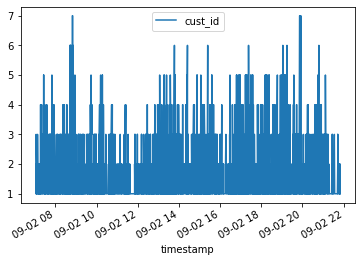

<Figure size 2160x720 with 0 Axes>

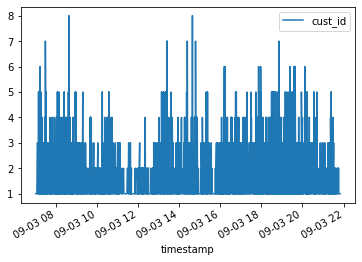

<Figure size 2160x720 with 0 Axes>

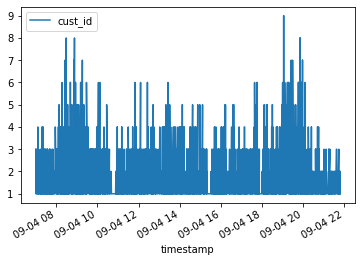

<Figure size 2160x720 with 0 Axes>

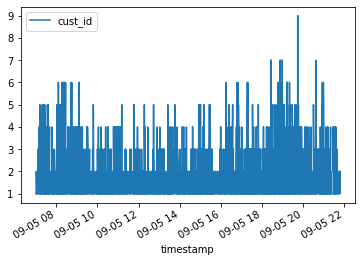

<Figure size 2160x720 with 0 Axes>

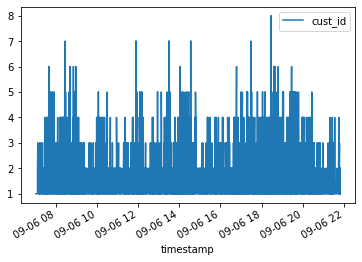

In [59]:
# plot daily customer distribution across timestamp
for i in set(df["weekday"]):
    plot_1 = df[df["weekday"]==i]
    plot_1 = plot_1.groupby(["location", "timestamp"]).nunique("count")["cust_id"]
    plot_1 = plot_1.reset_index().drop("location", axis=1).set_index("timestamp")
    plt.figure(figsize=(30,10))
    plot_1.plot(y="cust_id")
    plt.show()

In [60]:
# add total duration of customer in supermarket
df["time_min"]=df.groupby("cust_id").transform("min")["timestamp"]
df["time_max"]=df.groupby("cust_id").transform("max")["timestamp"]
df["time_total"]=df["time_max"]-df["time_min"]
df

,timestamp,customer_no,location,weekday,hour,minute,dayofweek,cust_id,revenue,time_min,time_max,time_total
0,2019-09-06 07:00:00,1,dairy,4,7,0,fri,fri1,5,2019-09-06 07:00:00,2019-09-06 07:05:00,00:05:00
1,2019-09-06 07:00:00,2,drinks,4,7,0,fri,fri2,6,2019-09-06 07:00:00,2019-09-06 07:01:00,00:01:00
2,2019-09-06 07:00:00,3,fruit,4,7,0,fri,fri3,4,2019-09-06 07:00:00,2019-09-06 07:11:00,00:11:00
3,2019-09-06 07:01:00,2,checkout,4,7,1,fri,fri2,0,2019-09-06 07:00:00,2019-09-06 07:01:00,00:01:00
4,2019-09-06 07:01:00,4,drinks,4,7,1,fri,fri4,6,2019-09-06 07:01:00,2019-09-06 07:02:00,00:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5045,2019-09-04 21:48:00,1528,spices,2,21,48,wed,wed1528,3,2019-09-04 21:45:00,2019-09-04 21:48:00,00:03:00
5046,2019-09-04 21:49:00,1520,dairy,2,21,49,wed,wed1520,5,2019-09-04 21:40:00,2019-09-04 21:49:00,00:09:00
5047,2019-09-04 21:49:00,1529,dairy,2,21,49,wed,wed1529,5,2019-09-04 21:45:00,2019-09-04 21:49:00,00:04:00
5048,2019-09-04 21:49:00,1530,fruit,2,21,49,wed,wed1530,4,2019-09-04 21:46:00,2019-09-04 21:49:00,00:03:00


In [61]:
# Customer distribution by timestamp
df.groupby(["timestamp"]).nunique("count")["cust_id"]

timestamp
2019-09-02 07:03:00    2
2019-09-02 07:04:00    6
2019-09-02 07:05:00    4
2019-09-02 07:06:00    8
2019-09-02 07:07:00    4
                      ..
2019-09-06 21:46:00    5
2019-09-06 21:47:00    4
2019-09-06 21:48:00    7
2019-09-06 21:49:00    4
2019-09-06 21:50:00    6
Name: cust_id, Length: 4363, dtype: int64

In [62]:
# Indicator for first location of cust_id
df["first_loc"] = (df.groupby('cust_id').cumcount() == 0).astype(int)
df

,timestamp,customer_no,location,weekday,hour,minute,dayofweek,cust_id,revenue,time_min,time_max,time_total,first_loc
0,2019-09-06 07:00:00,1,dairy,4,7,0,fri,fri1,5,2019-09-06 07:00:00,2019-09-06 07:05:00,00:05:00,1
1,2019-09-06 07:00:00,2,drinks,4,7,0,fri,fri2,6,2019-09-06 07:00:00,2019-09-06 07:01:00,00:01:00,1
2,2019-09-06 07:00:00,3,fruit,4,7,0,fri,fri3,4,2019-09-06 07:00:00,2019-09-06 07:11:00,00:11:00,1
3,2019-09-06 07:01:00,2,checkout,4,7,1,fri,fri2,0,2019-09-06 07:00:00,2019-09-06 07:01:00,00:01:00,0
4,2019-09-06 07:01:00,4,drinks,4,7,1,fri,fri4,6,2019-09-06 07:01:00,2019-09-06 07:02:00,00:01:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,2019-09-04 21:48:00,1528,spices,2,21,48,wed,wed1528,3,2019-09-04 21:45:00,2019-09-04 21:48:00,00:03:00,0
5046,2019-09-04 21:49:00,1520,dairy,2,21,49,wed,wed1520,5,2019-09-04 21:40:00,2019-09-04 21:49:00,00:09:00,0
5047,2019-09-04 21:49:00,1529,dairy,2,21,49,wed,wed1529,5,2019-09-04 21:45:00,2019-09-04 21:49:00,00:04:00,0
5048,2019-09-04 21:49:00,1530,fruit,2,21,49,wed,wed1530,4,2019-09-04 21:46:00,2019-09-04 21:49:00,00:03:00,0


In [63]:
# add before / afer structure
df["next_loc"]= df.groupby("cust_id")["location"].shift(-1)

In [65]:
# Transition probabilities
trans_prob=pd.crosstab(df['next_loc'], df['location'], normalize=0)
trans_prob

location,dairy,drinks,fruit,spices
next_loc,,,,
checkout,0.246056,0.282594,0.344479,0.126871
dairy,0.000000,0.041765,0.480299,0.477935
drinks,0.376901,0.000000,0.252353,0.370746
fruit,0.383218,0.369810,0.000000,0.246972
spices,0.379942,0.352060,0.267998,0.000000


In [ ]:
class Customer:

   def __init__(self, id, state, transition_mat):
      ...

   def __repr__(self):
      """
      Returns a csv string for that customer.
      """
      ...

   def is_active(self):
      """
      Returns True if the customer has not reached the checkout
      for the second time yet, False otherwise.
      """
      ...

   def next_state(self):
      """
      Propagates the customer to the next state
      using a weighted random choice from the transition probabilities
      conditional on the  current state.
      Returns nothing.
      """
      ...

# Moving customers in shop

In [32]:
from PIL import Image
import numpy as np

im = Image.open('supermarket.png')
im2 = Image.open('tiles.png')
market = np.array(im)
tiles = np.array(im2)
print(market.shape, market.dtype)
# print(tiles.shape, tiles.dtype)

(384, 576, 3) uint8


In [33]:
x = 4 * 32   # 5th column starting from 0
y = 1 * 32   # 2nd row
apple = tiles[y:y+32, x:x+32]

In [34]:
tx = 13 * 32
ty = 2 * 32
market[ty:ty+32, tx:tx+32] = apple

In [35]:
im = Image.fromarray(market)
im.save('supermarket_filled.png')